In [1]:
#carga de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importacion de datos
df=pd.read_excel('F:/Data Science/IA/Practicas/Venta de helados relacionado a la temp/IA.xlsx')
df

,temp,revenue
0,24.56,534.79
1,26.00,625.19
2,27.79,660.63
3,20.59,487.70
4,11.50,316.24
5,14.35,367.94
6,13.70,308.89
7,30.83,696.71
8,0.97,55.39
9,31.66,737.80


c:\Users\Mauro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='revenue'>

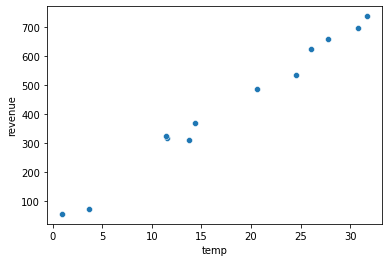

In [3]:
#visualizacion
sns.scatterplot(df['temp'],df['revenue'])

In [4]:
#carga set de datos
x_train=df['temp']
y_train=df['revenue']

In [5]:
#crear modelo
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

#modelo secuencial, capa por capa.
#capa input, es como vamos a recibir informacion de la red neuronal
#Dense capa simple, units e input shape se coloca 1 neurona por la simplicidad del trabajo

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#compilacion con optimizacion de funciones de perdida (se usa Adam)
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [8]:
#entrenamiento del modelo
epochs_hist = model.fit(x_train,y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 342ms/step - loss: 270005.5312
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 267778.7812
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 265561.5312
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 263353.9375
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 261156.1719
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 258968.3281
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 256790.6094
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 254623.1406
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 252466.0625
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 250319.5469
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 248183.6719
Epoch 12/1000
1/1 [==============================] - 0s 4ms/step - loss:

In [11]:
#evaluacion del modelo
epochs_hist.history.keys()


dict_keys(['loss'])


Text(0, 0.5, 'Valor')

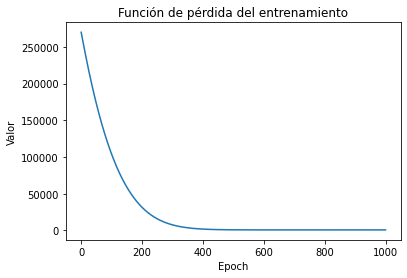

In [10]:
#graficando
plt.plot(epochs_hist.history['loss'])
plt.title('Función de pérdida del entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Valor')

In [12]:
#pesos
model.get_weights()

[array([[22.440155]], dtype=float32), array([24.903921], dtype=float32)]

22.44 es la pendiente de la recta.
24.9 es la ordenada al origen

In [20]:
#prediccion ejemplo
temp = 5
revenue = model.predict([temp])
print(revenue) 

1/1 [==============================] - 0s 151ms/step
[[137.10469]]


1/1 [==============================] - 0s 56ms/step


Text(0.5, 1.0, 'Ganancia en funcion de temperatura de una heladeria')

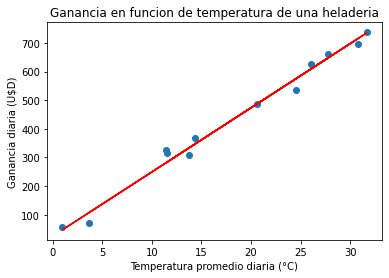

In [21]:
#Presentacion de resultado
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel('Temperatura promedio diaria (°C)')
plt.ylabel('Ganancia diaria (U$D)')
plt.title('Ganancia en funcion de temperatura de una heladeria')
